# Video Lecture 

## Steps for learning - 
1. watch lecture
2. read chapter
3. replicate the chapter notebook
4. try it on new dataset-

** can connect git to VS code, jupyter (everything!)

## some ideas popped up
1. stages of rotten banana classification - don't eat, can eat, wait to eat 
2. dal classifier - I suck at identifying the type (kind of bad for me according to Indian mom)
3. marvel vs dc movie poster classifier
4. face shape classifier and recommend hair styles 

## coding tips
1. we can use latex typset by enclosing in $ for plot titles and printing
2. functools-> partial, to fix the parameter values for your function

## modelling tips
1. start with basic archeitecture and experiment with data related things for faster results, last thing would be to change the archeitecture
2. try to think of trade off between speed and accuracy

## cool sites
1. matrixmultiplication.xyz


# Book Notes
## gyan ki bat
There is a lesson here for all of us! On your deep learning journey you will face many obstacles, both technical, and (even more difficult) posed by people around you who don't believe you'll be successful. There's one guaranteed way to fail, and that's to stop trying. We've seen that the only consistent trait amongst every fast.ai student that's gone on to be a world-class practitioner is that they are all very tenacious.

## coding
1. numpy stores data in form of compact C data structures

## DL
1. We already know that a single nonlinearity with two linear layers is enough to approximate any function. So why would we use deeper models? The reason is performance. With a deeper model (that is, one with more layers) we do not need to use as many parameters; it turns out that we can use smaller matrices with more layers, and get better results than we would get with larger matrices, and few layers.

## question to address in blog
1. why it is called stochastic? the gradient descent method
2. instantiate a class
3. object of a class

# TODO
    Create your own implementation of Learner from scratch, based on the training loop shown in this chapter.
    Complete all the steps in this chapter using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome some obstacles you'll meet on the way.



In [3]:
import fastbook
fastbook.setup_book()

In [4]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image',cmap='gray')

# Data Load

In [5]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

In [6]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [7]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [9]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()

In [10]:
im3path = threes[1]
im = Image.open(im3path)
im

In [13]:
im3_t = tensor(im)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


# Data Preparation

In [15]:
threes_ls = [tensor(Image.open(i)) for i in threes]
sevens_ls = [tensor(Image.open(i)) for i in sevens]
len(threes_ls),len(sevens_ls)

(6131, 6265)

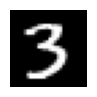

In [18]:
show_image(threes_ls[1]);

In [20]:
stacked_threes = torch.stack(threes_ls).float()/255
stacked_sevens = torch.stack(sevens_ls).float()/255
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [22]:
# rank of the tensor - number of dimenesions
stacked_sevens.ndim

3

In [23]:
mean_3 = stacked_threes.mean(0)
mean_7 = stacked_sevens.mean(0)

<Axes: >

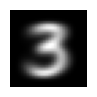

In [24]:
show_image(mean_3)

<Axes: >

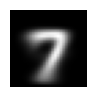

In [25]:
show_image(mean_7)

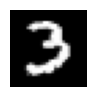

In [28]:
a_3 = stacked_threes[4]
show_image(a_3);

# Baseline Model

In [29]:
dist_3_abs = (a_3-mean_3).abs().mean()
dist_3_sqr = ((a_3-mean_3)**2).mean().sqrt()
dist_7_abs = (a_3-mean_7).abs().mean()
dist_7_sqr = ((a_3-mean_7)**2).mean().sqrt()
dist_3_abs,dist_3_sqr,dist_7_abs,dist_7_sqr

(tensor(0.1300), tensor(0.2369), tensor(0.1680), tensor(0.3125))

In [32]:
F.l1_loss(a_3,mean_3), F.mse_loss(a_3,mean_3).sqrt()

(tensor(0.1300), tensor(0.2369))

In [37]:
avg_l1_loss_33 = tensor([F.l1_loss(stacked_threes[i],mean_3) for i in range(len(stacked_threes))]).mean(0)
avg_mse_loss_33 = tensor([F.mse_loss(stacked_threes[i],mean_3) for i in range(len(stacked_threes))]).mean(0)

avg_l1_loss_37 = tensor([F.l1_loss(stacked_threes[i],mean_7) for i in range(len(stacked_threes))]).mean(0)
avg_mse_loss_37 = tensor([F.mse_loss(stacked_threes[i],mean_7) for i in range(len(stacked_threes))]).mean(0)

In [38]:
avg_l1_loss_33,avg_mse_loss_33,avg_l1_loss_37,avg_mse_loss_37

(tensor(0.1313), tensor(0.0573), tensor(0.1598), tensor(0.0922))

In [40]:
valid_3_ten = torch.stack([tensor(Image.open(i)) for i in (path/'valid/3').ls()]).float()/255
valid_7_ten = torch.stack([tensor(Image.open(i)) for i in (path/'valid/7').ls()]).float()/255

In [41]:
valid_3_ten.shape,valid_7_ten.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [57]:
def mnist_dist(a,b,dist='l1'):
    if dist == 'l1': return (a-b).abs().mean((1,2))
    else : return ((a-b)**2).mean((-1,-2))

In [58]:
mnist_dist(valid_3_ten,mean_3).shape

torch.Size([1010])

In [59]:
def is_3(x) :return mnist_dist(x,mean_3) < mnist_dist(x,mean_7)

In [64]:
is_3(valid_3_ten).float().mean()

tensor(0.9168)

In [65]:
accuracy_3 = is_3(valid_3_ten).float().mean()
accuracy_7 = 1- is_3(valid_7_ten).float().mean()
accuracy_3,accuracy_7

(tensor(0.9168), tensor(0.9854))

# Example of SGD working

In [138]:
def f(x) : return 3*x**2+2*x+1

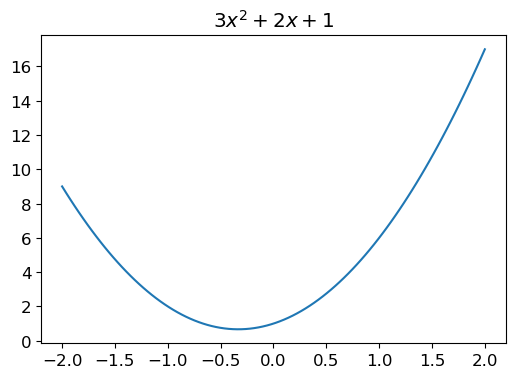

In [139]:
plot_function(f,title = '$3x^2+2x+1$')

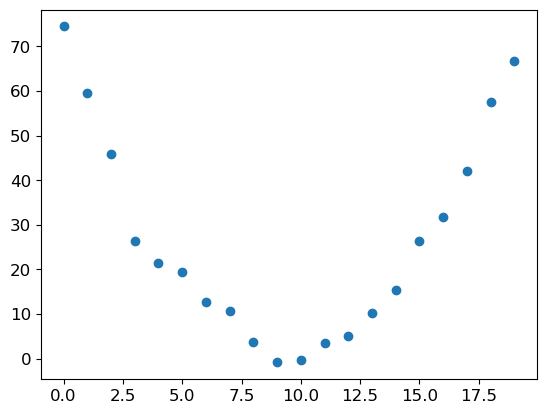

In [156]:

time = torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [157]:
def f(x,params) : 
    a,b,c = params
    return a*x**2+b*x+c

In [159]:
def mse(preds,actual) : return ((preds-actual)**2).mean()

In [161]:
preds = f(time,params)

In [174]:
def show_preds(preds):
    plt.scatter(time,speed)
    plt.scatter(time,to_np(preds),color='red')

In [178]:
def optimi_steps(params , prnt = True):
    lr = 1e-5
    preds = f(time,params)
    loss = mse(preds,speed)
    loss.backward()
    params.data -= lr*params.grad.data
    params.grad=None
    if prnt : print(loss.item())
    return preds

In [181]:
params = torch.rand(3).float().requires_grad_()
origi_params = params.clone()
for i in range(10):
    optimi_steps(params)

12121.3232421875
2858.13037109375
1105.2470703125
773.5438232421875
710.7711181640625
698.8882446289062
696.6353149414062
696.2047729492188
696.1189575195312
696.0983276367188


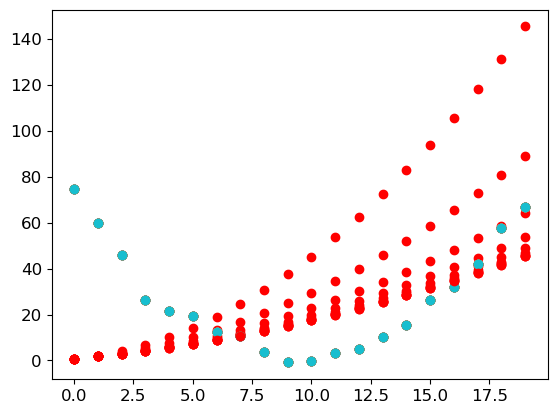

In [183]:
params = origi_params.detach().requires_grad_()
for i in range(10):
    show_preds(optimi_steps(params,False))

# MNIST Data

In [189]:
train_x = torch.cat([stacked_threes,stacked_sevens]).view(-1,28*28)

In [190]:
train_x.shape

torch.Size([12396, 784])

In [191]:
train_y = (tensor([1]*len(threes_ls) + [0]*len(sevens_ls))).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [192]:
dset = list(zip(train_x,train_y))

In [194]:
x,y = dset[0]
x,y

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

In [195]:
valid_x = torch.cat([valid_3_ten,valid_7_ten]).view(-1,28*28)
valid_x.shape

torch.Size([2038, 784])

In [198]:
valid_y = (tensor([1]*len(valid_3_ten) + [0]*len(valid_7_ten))).unsqueeze(1)
valid_y.shape

torch.Size([2038, 1])

In [199]:
valid_dset = list(zip(valid_x,valid_y))

In [279]:
def initi_params(size,std=0.1): return (torch.rand(size)*std).requires_grad_()

In [280]:
weights = initi_params((28*28,1))
weights.shape

torch.Size([784, 1])

In [281]:
bias = initi_params(1)
bias

tensor([0.0480], requires_grad=True)

In [282]:
(train_x[0]*weights.T).sum() + bias

tensor([5.5911], grad_fn=<AddBackward0>)

In [283]:
def linear1(xb) : return xb@weights+bias
preds = linear1(train_x)
preds

tensor([[5.5911],
        [5.5242],
        [5.7328],
        ...,
        [4.6920],
        [4.7256],
        [3.8727]], grad_fn=<AddBackward0>)

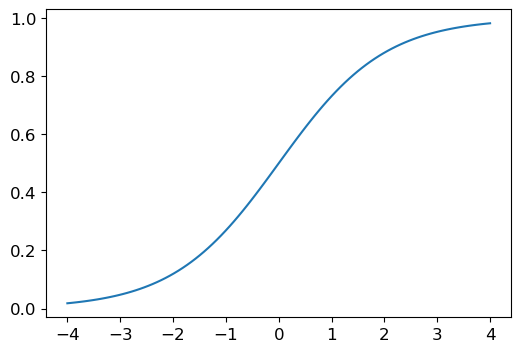

In [284]:
def sigmoid(x): return (1/(1+torch.exp(-x)))
plot_function(torch.sigmoid,min=-4,max=4)

In [285]:
def mnist(preds, targets):
    preds = preds.sigmoid()
    return torch.where(targets==1,1-preds,preds).mean()

In [286]:
def calc_grad(xb,yb,model):
    preds = model(xb)
    loss = mnist(preds,yb)
    loss.backward()

In [287]:
def train_epoch(model,lr,params):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        for p in params :
            p.data -=lr*p.grad
            p.grad.zero_()

In [288]:
def batch_accuracy(xb,yb):
    pred = xb.sigmoid()
    correct = (pred>=0.5) == yb
    return correct.float().mean()

In [289]:
def validate_model(model):
    correct_ls = [batch_accuracy(model(xb),yb) for xb,yb in valid_dl]
    return round(torch.stack(correct_ls).mean().item(),4)

In [332]:
dl = DataLoader(dset,batch_size=256,shuffle=True)
valid_dl = DataLoader(valid_dset,batch_size = 256)
lr = 0.1
wieghts = initi_params(28*28)
bias = initi_params(1)
params = weights,bias

In [333]:
for i in range(10):
    train_epoch(linear1,lr,params)
    print(validate_model(linear1),end=" \n")

0.9814 
0.9814 
0.9819 
0.9819 
0.9819 
0.9819 
0.9819 
0.9819 
0.9814 
0.9819 


# optimizer class

In [301]:
class basic_optim:
    def __init__(self,lr,params) : 
        self.lr = lr 
        self.params = list(params)
    def step(self, *args,**kwargs):
        for p in self.params: p.data -= p.grad.data*self.lr
    def zero_grad(self,*args,**kwargs):
        for p in self.params : p.grad=None

In [302]:

def train_epoch_opti(model):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        opt.step()
        opt.zero_grad()

In [303]:
def train_model(model,epochs):
    for i in range(epochs):
        train_epoch_opti(model)
        print(validate_model(model))

In [304]:
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
opt = basic_optim(lr,linear_model.parameters())
train_model(linear_model,10)

0.4932
0.6978
0.8598
0.9184
0.936
0.9492
0.9575
0.9633
0.9658
0.9687


In [306]:
dls = DataLoaders(dl,valid_dl)
learner = Learner(dls,nn.Linear(28*28,1),opt_func=SGD,loss_func=mnist,metrics=batch_accuracy)

In [309]:
learner.fit(10,lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636921,0.503387,0.495584,00:00
1,0.493393,0.195430,0.834642,00:00
2,0.182177,0.176798,0.842983,00:00
3,0.080584,0.105720,0.912169,00:00
4,0.043094,0.077482,0.933759,00:00
5,0.028419,0.062191,0.947498,00:00
6,0.022367,0.052632,0.955348,00:00
7,0.019655,0.046259,0.962218,00:00
8,0.018261,0.041778,0.965162,00:00
9,0.017412,0.038475,0.967615,00:00


In [324]:
simple_net = nn.Sequential(nn.Linear(28*28,30),
                           nn.ReLU(),
                           nn.Linear(30,1)
                          )
learner = Learner(dls,simple_net, opt_func=SGD,loss_func=mnist,metrics=batch_accuracy)

In [325]:
learner.fit(40,lr=0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.389341,0.381120,0.559863,00:00
1,0.173680,0.262787,0.766928,00:00
2,0.092629,0.127617,0.905299,00:00
3,0.058327,0.083545,0.936703,00:00
4,0.042790,0.064208,0.950932,00:00
5,0.035098,0.053505,0.962709,00:00
6,0.030823,0.046803,0.965653,00:00
7,0.028121,0.042253,0.966634,00:00
8,0.026208,0.038968,0.968597,00:00
9,0.024741,0.036475,0.969578,00:00


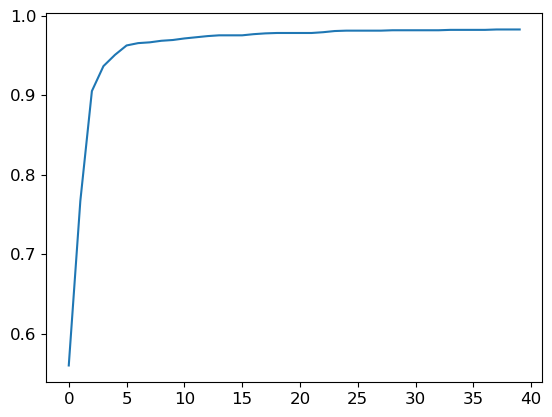

In [326]:
plt.plot(L(learner.recorder.values).itemgot(2))

In [327]:
learner.recorder.values[-1][2]

0.982826292514801

## Questionnaire

In [335]:
ls_comp = [2*i for i in range(20) if i%2!=0]
ls_comp

[2, 6, 10, 14, 18, 22, 26, 30, 34, 38]

In [345]:
tens_33 = torch.randint(1,9,(3,3))
tens_33*2

tensor([[ 2,  8, 12],
        [ 4, 14, 12],
        [ 8,  2, 10]])

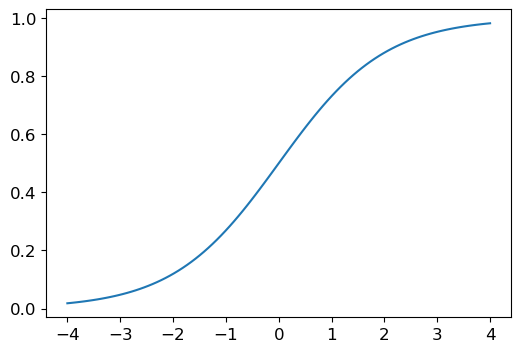

In [347]:
plot_function(F.sigmoid,min=-4,max=4)

### one epoch of SGD
1. start with random initialization of weights
2. make prediction using weights
3. calculate loss
4. calculate gradient
5. update weigths using learning rate multiplier
6. calculate metric on validation set
7. go to step 2 and repeat 


In [348]:
inp1 = [1,2,3,4]
inp2 = 'abcd'
list(zip(inp1,inp2))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

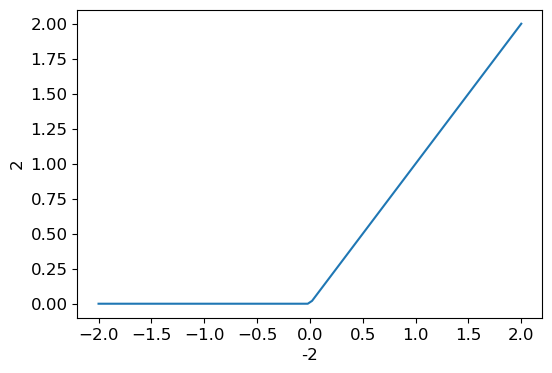

In [349]:
plot_function(F.relu,-2,2)